# Results 200

## Purpose 
For this notebook we will show results for our research question 2 "What factors impact the success of a top player?". We will do this by taking the analysis we examined in Analysis 400.

## Datasets
For analysis in this notebook we used the 2 dataframes created in Prep 300 and Prep 400

In [1]:
# Importing relevant libraries
import os
import sys
import hashlib
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
    
%matplotlib inline

In [2]:
RQ2_winners = pd.read_csv("../data/winners_df", low_memory = False)

In [3]:
RQ2_losers = pd.read_csv("../data/losers_df", low_memory = False)

## Difference between top players and top losers regarding match statistics

#### Aces

In [4]:
# creating a dataframe with the average aces for each player type which we calculated in Analysis 400
aces_df = pd.DataFrame({'win/lose': ['male_winner', 'male_loser', 'female_winner', 'female_loser'], 
                        'aces': [6.12, 3.71, 3.64, 1.44]})

Text(0.5,1,'Difference in top winner and top loser average aces')

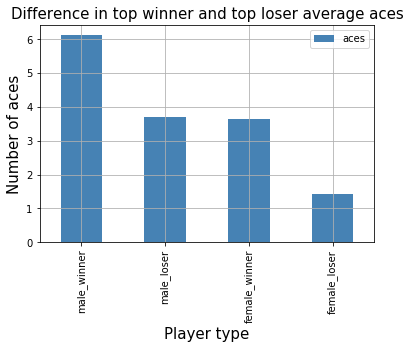

In [5]:
# plotting bar chart for average aces per losers and winners
aces_df.plot.bar(x='win/lose', y='aces', color = 'steelblue');
plt.xlabel('Player type', fontsize=15)
plt.ylabel('Number of aces', fontsize=15)
plt.grid(True)
plt.title('Difference in top winner and top loser average aces', fontsize=15)

 We see males hit an average of 6 aces per game and winning females hit on average 3.5 aces per match. The losing side get nearly half as many aces with males only getting above 3 and females getting just 1 ace. 

#### Double faults

In [6]:
# creating a dataframe with the average double faults for each player type which we calculated in Analysis 400
dfaults_df = pd.DataFrame({'win/lose': ['male_winner', 'male_loser', 'female_winner', 'female_loser'], 
                        'df': [2.1, 3.0, 3.0, 3.9]})

Text(0.5,1,'Difference in top winner and top loser average double faults')

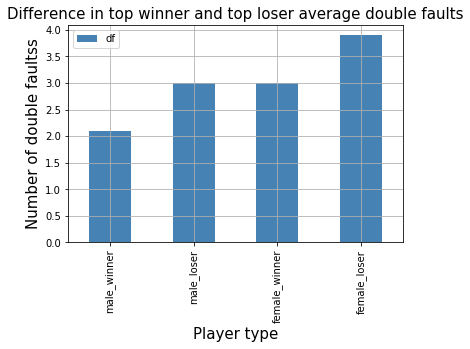

In [7]:
# plotting bar chart for average aces per losers and winners
dfaults_df.plot.bar(x='win/lose', y='df', color = 'steelblue');
plt.xlabel('Player type', fontsize=15)
plt.ylabel('Number of double faultss', fontsize=15)
plt.grid(True)
plt.title('Difference in top winner and top loser average double faults', fontsize=15)

Winning males incur on average 2 double faults per match and the winning females incur on average 3 double faults. The top female losers average 4 double faults per match. There are 4 points in a game so mistakes like that may cost that player the game.

#### Aces for each player showing not all the top players have equal amount of aces

A lot of aces doesn't necessarily mean the best player, it certainly helps, but consistency is key.

In [8]:
RQ2_sorted_w_ace = RQ2_winners.sort_values('w_ace', ascending=False).reset_index(drop=True)

In [9]:
RQ2_sorted_l_ace = RQ2_losers.sort_values('l_ace', ascending=False).reset_index(drop=True)

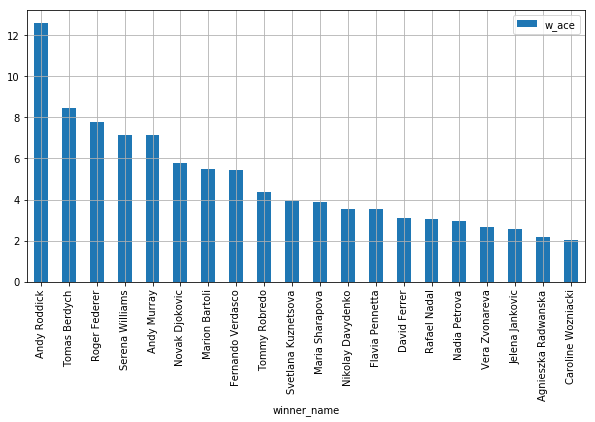

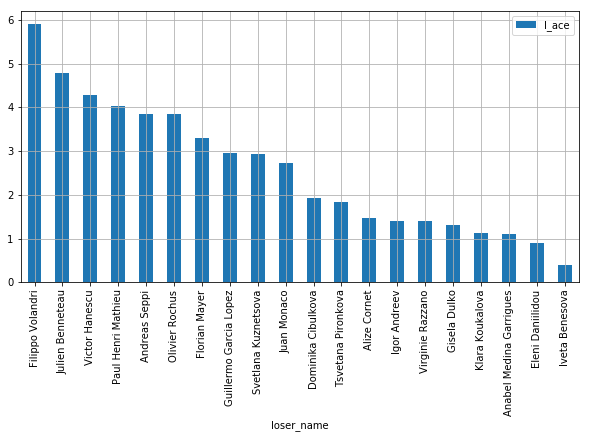

In [10]:
RQ2_sorted_w_ace.plot(kind='bar', x='winner_name', y='w_ace', grid=True, figsize=(10,5))
RQ2_sorted_l_ace.plot(kind='bar', x='loser_name', y='l_ace', grid=True, figsize=(10,5))

### Correlations

#### Aces vs winning and losing percentage

Text(0.5,1,'Correlation between number of losers aces and losing percentage')

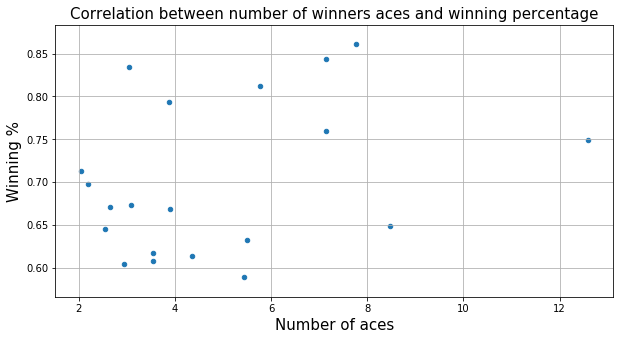

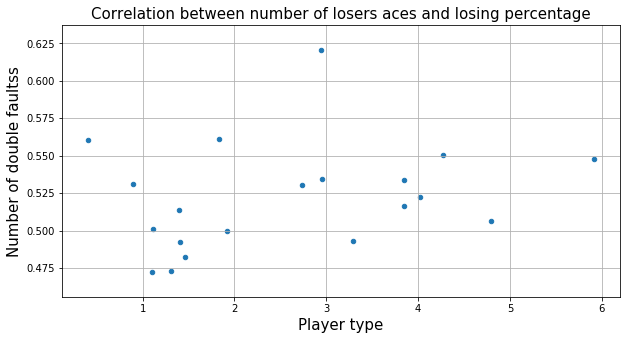

In [11]:
# winners
RQ2_winners.plot(kind='scatter', x='w_ace', y='winning_perc', grid=True, figsize=(10,5))
plt.xlabel('Number of aces', fontsize=15)
plt.ylabel('Winning %', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of winners aces and winning percentage', fontsize=15)

#losers
RQ2_losers.plot(kind='scatter', x='l_ace', y='losing_perc', grid=True, figsize=(10,5))
plt.xlabel('Player type', fontsize=15)
plt.ylabel('Number of double faultss', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of losers aces and losing percentage', fontsize=15)

Here we wanted to examine if there was a relationship between a players winning percentage or losing percentage and the number of aces they get. What we would have expected was that there would be a positive correlation and that the higher the winning percentage the higher the number of aces but as we can see thats not the case. This just re-enforces the idea that hitting an ace may be good but its not all that is required to be a top player.

#### Double faults vs winning and losing percentage

Text(0.5,1,'Correlation between number of losers double faults and losing percentage')

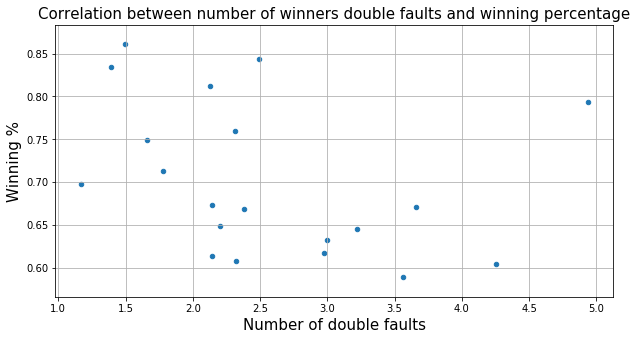

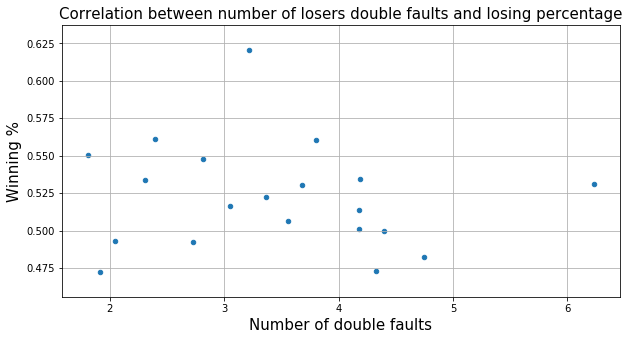

In [12]:
# winners
RQ2_winners.plot(kind='scatter', x='w_df', y='winning_perc', grid=True, figsize=(10,5))
plt.xlabel('Number of double faults', fontsize=15)
plt.ylabel('Winning %', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of winners double faults and winning percentage', fontsize=15)

# losers
RQ2_losers.plot(kind='scatter', x='l_df', y='losing_perc', grid=True, figsize=(10,5))
plt.xlabel('Number of double faults', fontsize=15)
plt.ylabel('Winning %', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of losers double faults and losing percentage', fontsize=15)

Again, not seeing a strong correlation with winning and losing percentage versus double faults

#### Break points faced vs winning and losing percentage

Text(0.5,1,'Correlation between number of break points losers faced and losers percentage')

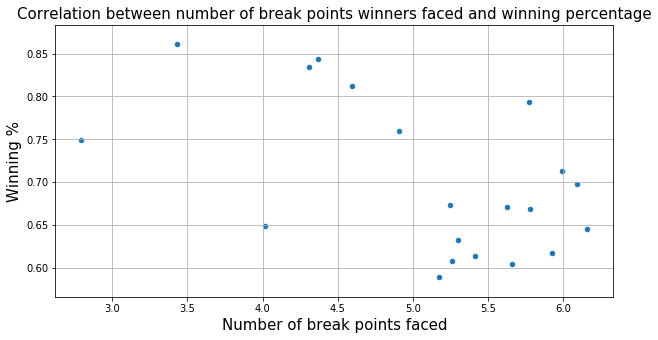

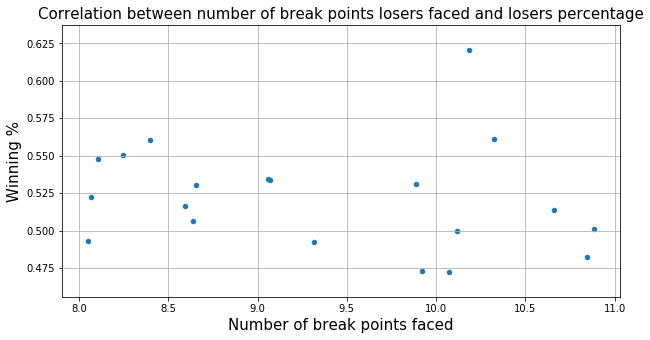

In [13]:
# winners 
RQ2_winners.plot(kind='scatter', x='w_bpFaced', y='winning_perc', grid=True, figsize=(10,5))
plt.xlabel('Number of break points faced', fontsize=15)
plt.ylabel('Winning %', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of break points winners faced and winning percentage', fontsize=15)

#losers
RQ2_losers.plot(kind='scatter', x='l_bpFaced', y='losing_perc', grid=True, figsize=(10,5))
plt.xlabel('Number of break points faced', fontsize=15)
plt.ylabel('Winning %', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of break points losers faced and losers percentage', fontsize=15)

Slight correlation with break points faced and winning percentage. As the winning percentage gets lower the break points faced becomes higher.

#### Aces vs double faults

Text(0.5,1,'Correlation between number of losers aces and double faults')

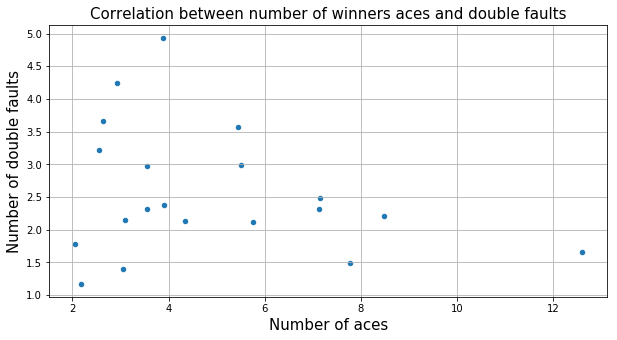

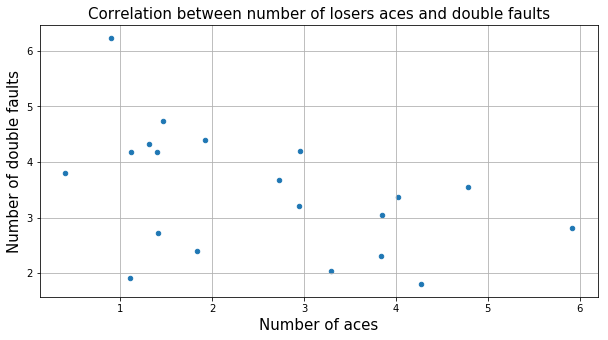

In [14]:
# winners
RQ2_winners.plot(kind='scatter', x='w_ace', y='w_df', grid=True, figsize=(10,5))
plt.xlabel('Number of aces', fontsize=15)
plt.ylabel('Number of double faults', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of winners aces and double faults', fontsize=15)

#losers
RQ2_losers.plot(kind='scatter', x='l_ace', y='l_df', grid=True, figsize=(10,5))
plt.xlabel('Number of aces', fontsize=15)
plt.ylabel('Number of double faults', fontsize=15)
plt.grid(True)
plt.title('Correlation between number of losers aces and double faults', fontsize=15)

Interestingly there isn't a strong correlation between aces and double faults. We would have expected the higher the aces the lower the double faults. 